In [6]:
import glob
import numpy
import pandas
import seaborn
import matplotlib.pyplot as plt
from tqdm import tqdm
import multiprocessing as mp
import os
from build import build_model
import coralme
plt.rcParams['svg.fonttype'] = 'none'
from coralme.builder.helper_functions import flux_based_reactions
pandas.set_option('display.max_colwidth', None)

In [2]:
from IPython.display import display, HTML, Math, Markdown
display(HTML("<style>.container { width:95% !important; }</style>"))

%load_ext autoreload
%autoreload 2

In [22]:
growth = pandas.read_csv("./datasets/all_growth_rates.csv",index_col=0).drop("mid_zinc",axis=1)
taxonomy = pandas.read_csv("./taxonomy.txt",index_col=0,sep='\t')
taxonomy = taxonomy[taxonomy["Kingdom"]=="Bacteria"]
growth = growth.loc[[i for i in taxonomy.index]].fillna(0.)

In [24]:
fold = growth.div(growth["base"],axis=0).drop("base",axis=1)
fold = pandas.concat([fold,taxonomy],axis=1)

In [25]:
mean = fold.groupby("Genus").mean()
std = fold.groupby("Genus").std()


/tmp/ipykernel_819893/469519048.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean = fold.groupby("Genus").mean()
/tmp/ipykernel_819893/469519048.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  std = fold.groupby("Genus").std()


In [35]:
mean["low_zinc"].value_counts()

0.000000    156
0.140953      1
0.999306      1
0.024983      1
0.644224      1
0.176003      1
0.666172      1
0.149829      1
0.230639      1
0.111087      1
0.499992      1
0.499644      1
0.047598      1
0.497323      1
Name: low_zinc, dtype: int64

In [36]:
169-156

13

In [27]:
adv = pandas.read_csv("./datasets/2.3.3.MW-greater.csv",index_col=0)
dadv = pandas.read_csv("./datasets/2.3.3.MW-less.csv",index_col=0)

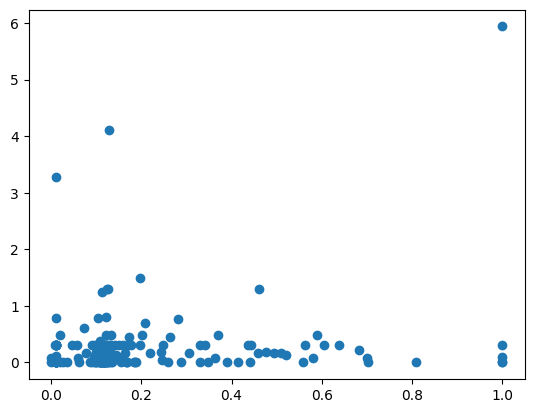

In [33]:
col = "low_iron"
plt.scatter(x=mean[col],y=(-numpy.log10(dadv[col])))

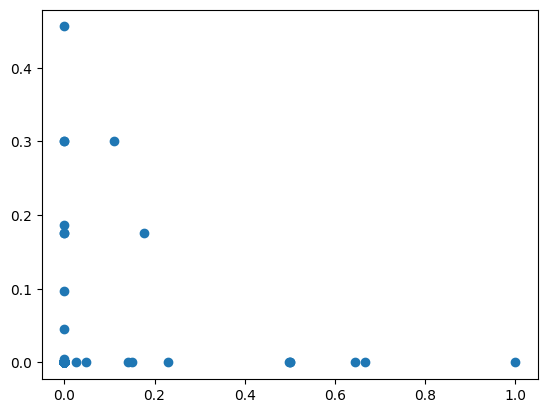

In [34]:
col = "low_zinc"
plt.scatter(x=mean[col],y=(-numpy.log10(dadv[col])))